In [2]:
import numpy as np
import torch
import pandas as pd
import matplotlib as plt

C:\Users\zkdls\anaconda3\envs\class\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
excel_file = ''
df = pd.read_excel(excel_file)
df

,Lon,Lat,Dep,Mo,Mw,Mxslp,Xorg,Worg,Dx,Dw,Vr,M
0,97.1320,2.3600,31.00,3.990000e+20,7.67,3.57,4,9,10,10,3.2,7.7
1,96.6290,33.2710,10.00,2.060000e+19,6.81,1.40,4,2,10,5,3.2,6.9
2,96.0550,3.7750,45.00,8.790000e+19,7.23,2.11,3,4,10,10,3.4,7.2
3,166.5770,-13.6690,31.00,6.650000e+19,7.15,2.57,5,2,10,10,3.2,7.2
4,91.9380,7.7480,35.00,1.580000e+20,7.40,1.73,5,4,10,10,3.0,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...
130,138.5665,31.4280,397.26,2.600000e+19,6.88,1.03,2,2,5,5,3.0,7.0
131,145.2275,40.7753,64.00,3.850000e+19,6.99,3.67,2,3,5,5,3.2,6.9
132,142.0910,38.8747,40.00,3.780000e+18,6.32,0.27,4,4,5,5,3.0,6.2
133,145.1260,49.7840,625.00,3.930000e+20,7.66,4.46,5,5,10,10,2.0,7.3


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['M', 'Mw'])
y = df['M']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

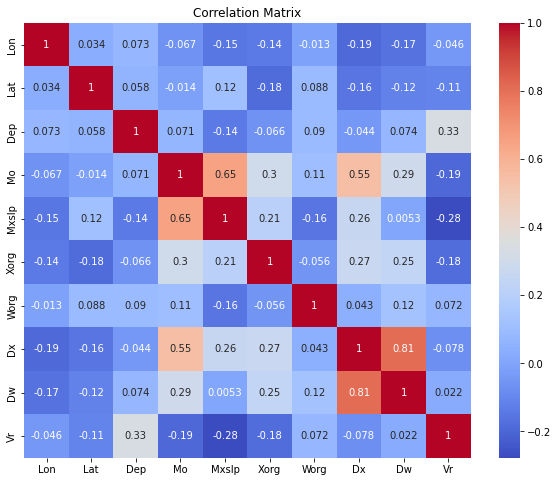

In [20]:
# 변수들 간의 상관계수 계산
correlation_matrix = X.corr()

# 상관계수 히트맵 출력
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [19]:
df[['Mw','M']]

,Mw,M
0,7.67,7.7
1,6.81,6.9
2,7.23,7.2
3,7.15,7.2
4,7.40,7.4
...,...,...
130,6.88,7.0
131,6.99,6.9
132,6.32,6.2
133,7.66,7.3


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.012723115823538687


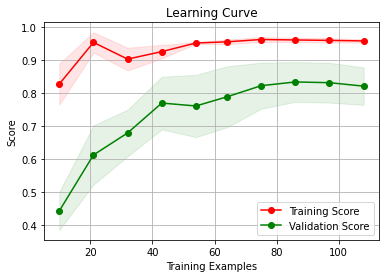

In [8]:
from sklearn.model_selection import learning_curve

# 학습 곡선 계산
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# 학습 세트의 평균과 표준 편차 계산
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 검증 세트의 평균과 표준 편차 계산
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# 학습 곡선 그리기
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(
    train_sizes, 
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1, color="r"
)
plt.fill_between(
    train_sizes, 
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1, color="g"
)

plt.plot(
    train_sizes, train_scores_mean,
    'o-', color="r", label="Training Score"
)
plt.plot(
    train_sizes, val_scores_mean,
    'o-', color="g", label="Validation Score"
)

plt.legend(loc="best")
plt.show()


In [14]:
excel_file2 = ''
df_test = pd.read_excel(excel_file2)
df_test

X2 = df_test.drop(columns=['M', 'Mw'])
X2

,Lon,Lat,Dep,Mo,Mxslp,Xorg,Worg,Dx,Dw,Vr
0,143.2275,42.7020,101.95,2.670000e+19,1.18,3,3,5,5,3.5
1,134.8290,34.4188,14.85,5.330000e+17,0.71,4,4,2,2,2.7
2,144.5687,37.1963,56.00,6.590000e+19,1.71,5,2,10,10,3.4
3,137.8910,36.6928,4.59,8.090000e+18,2.44,7,2,3,3,2.0
4,142.1502,38.8628,46.24,9.490000e+18,0.55,3,7,5,5,3.0
5,140.6825,27.8608,681.71,7.390000e+20,6.56,5,6,10,10,2.0
6,142.8012,41.9702,51.51,8.980000e+18,3.02,5,4,2,2,3.1
7,130.8087,32.7417,11.39,2.930000e+18,0.72,4,4,3,3,2.4
8,130.7777,32.7007,6.71,8.140000e+17,0.39,4,3,3,3,2.4
9,130.7630,32.7545,12.45,8.250000e+19,12.47,1,4,3,3,2.2


In [15]:
predictions = rf_model.predict(X2)

df_test['M_pred'] = predictions

df_test[['M','M_pred']]

,M,M_pred
0,6.5,6.988437
1,6.3,6.419411
2,7.1,7.103631
3,6.7,6.549493
4,6.8,6.531880
5,8.1,7.808886
6,6.7,6.513270
7,6.5,6.417189
8,6.4,6.447206
9,7.3,7.263058


In [16]:
from sklearn.metrics import mean_squared_error

# 예측값과 실제값 추출
M_pred = df_test['M_pred']
M_test = df_test['M']

# MSE 계산
mse = mean_squared_error(M_test, M_pred)

# 결과 출력
print("MSE:", mse)



MSE: 0.04694881784466896


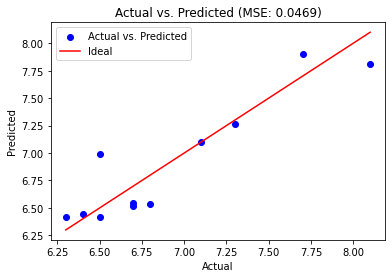

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 예측값과 실제값 추출
M_pred = df_test['M_pred']
M_test = df_test['M']

# MSE 계산
mse = mean_squared_error(M_test, M_pred)

# 산점도와 회귀선 그리기
plt.scatter(M_test, M_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(M_test), max(M_test)], [min(M_test), max(M_test)], color='red', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (MSE: %.4f)' % mse)
plt.legend()
plt.show()
